In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm
from IPython.display import clear_output

tqdm.pandas()
pd.options.display.max_colwidth = -1
pd.options.display.max_columns = 25

In [3]:
from dsutils.eda import *
from dsutils.stats import *
from dsutils.ml import *

In [4]:
data = pd.read_csv('advanced_features.csv')

In [5]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,abs_token_diff,avg_num_token,rel_token_diff,token_intersection,token_union,jaccard_similarity_token,...,rel_word_diff,word_intersection,word_union,jaccard_similarity_word,lcs_word,lcs_word_ratio,fuzz_simple_ratio,fuzz_partial_ratio,fuzz_token_sort_ratio,fuzz_token_set_ratio,hamming_distance,cosine_distance
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,2,13.0,0.153846,10,13,0.769231,...,0.153846,5,6,0.833333,6,0.923077,92,98,92,100,0.000011,0.025243
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,5,10.5,0.476190,4,16,0.250000,...,0.666667,4,11,0.363636,4,0.533333,64,91,62,89,0.000074,0.233014
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0,4,12.0,0.333333,3,21,0.142857,...,0.181818,3,8,0.375000,1,0.181818,66,67,71,85,0.000053,0.530295
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0,2,10.0,0.200000,0,19,0.000000,...,0.571429,0,11,0.000000,0,0.000000,44,56,15,19,0.000117,1.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0,6,10.0,0.600000,2,18,0.111111,...,0.666667,2,13,0.153846,1,0.133333,52,64,42,53,0.000117,0.764240


In [6]:
data.shape

(404124, 30)

In [7]:
feats = ['abs_token_diff', 'avg_num_token', 'rel_token_diff', 
         'token_intersection', 'token_union', 'jaccard_similarity_token',
         'lcs_token', 'lcs_token_ratio',
         'abs_word_diff', 'avg_num_word', 'rel_word_diff',
         'word_intersection', 'word_union', 'jaccard_similarity_word',
         'lcs_word', 'lcs_word_ratio',
         'fuzz_simple_ratio', 'fuzz_partial_ratio', 'fuzz_token_sort_ratio', 'fuzz_token_set_ratio',
         'hamming_distance', 'cosine_distance'
]
target = 'is_duplicate'

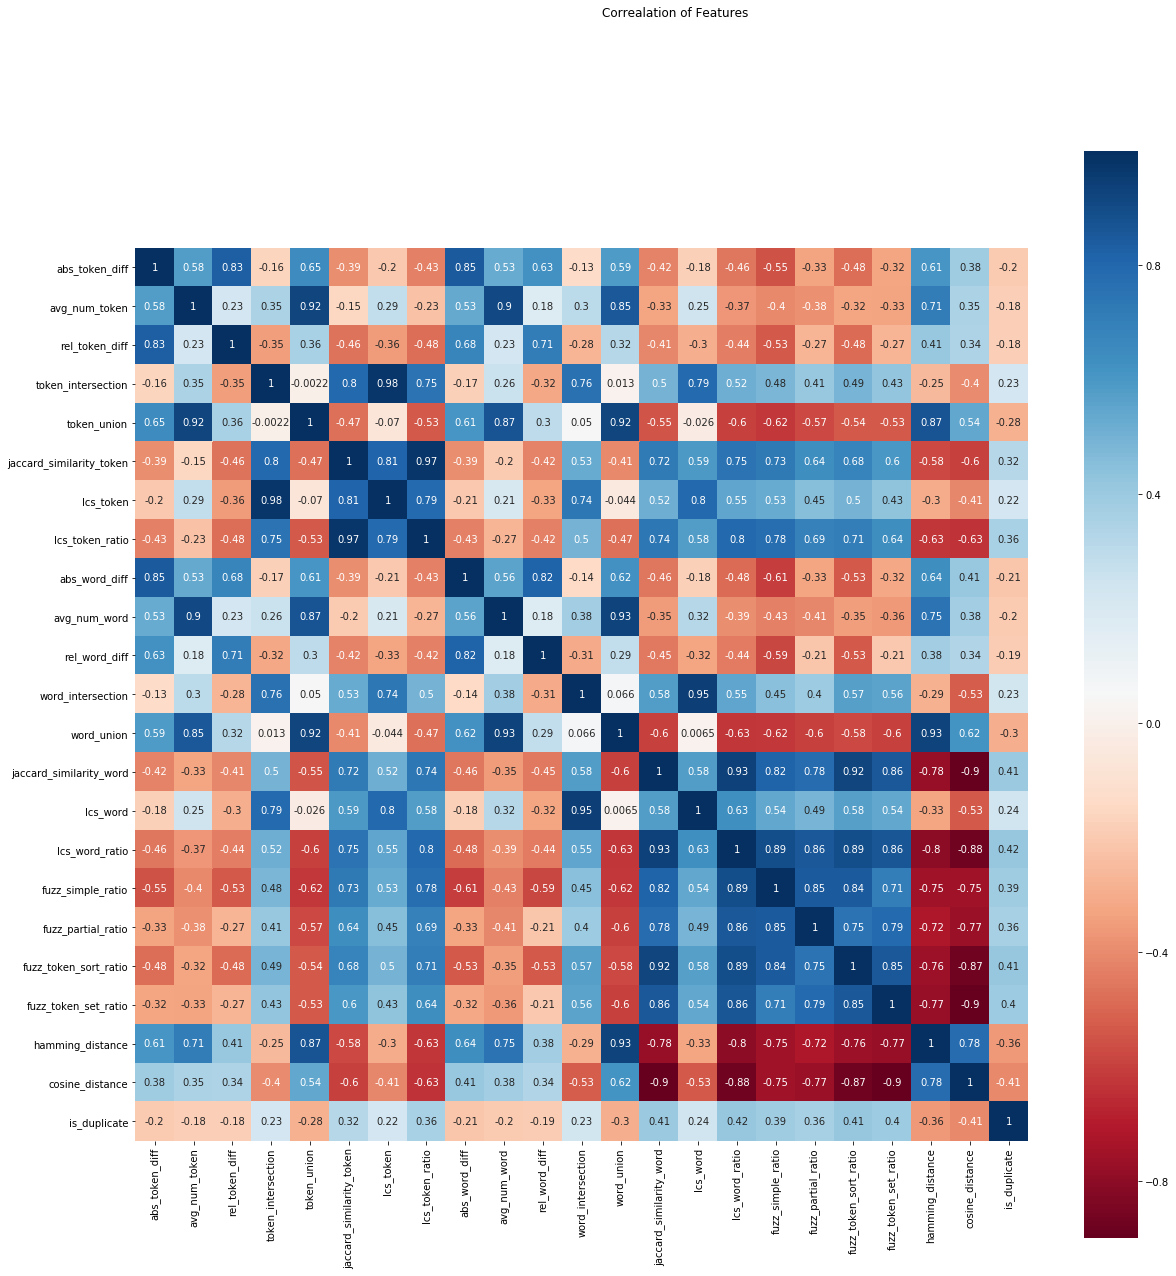

In [8]:
fig, ax = plt.subplots(figsize=(20,20))
fig.suptitle('Correalation of Features')
sns.heatmap(data[feats+[target]].corr(), square=True, annot=True, cmap='RdBu')

In [9]:
from sklearn. linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from xgboost import XGBClassifier

Mean Loss 0.5510052409786768 +- 0.0017777686343765167


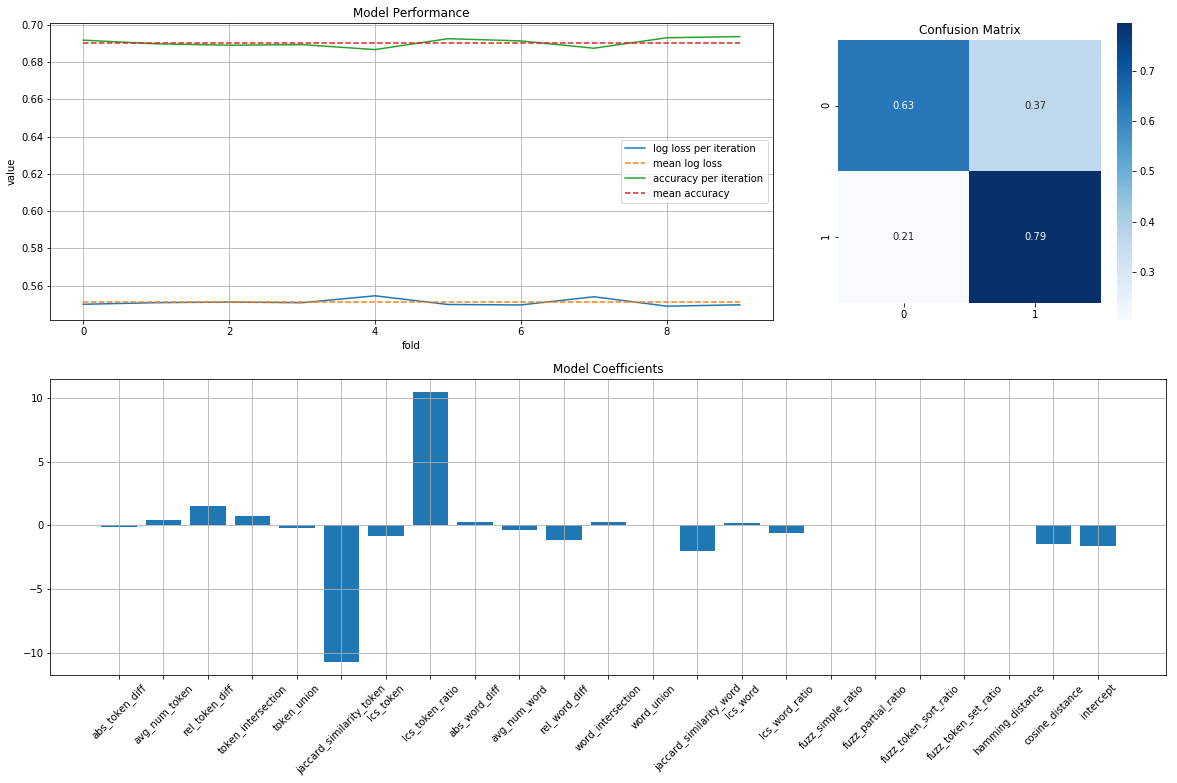

In [10]:
model = LogisticRegression(class_weight='balanced')
lr_performance, lr_cm, lr_model = train_model_lr(model, data, feats, 'is_duplicate')
print('Mean Loss', np.mean(lr_performance['log loss']), '+-', np.std(lr_performance['log loss']))

Mean Loss 0.4569710665692135 +- 0.0012095378597342997


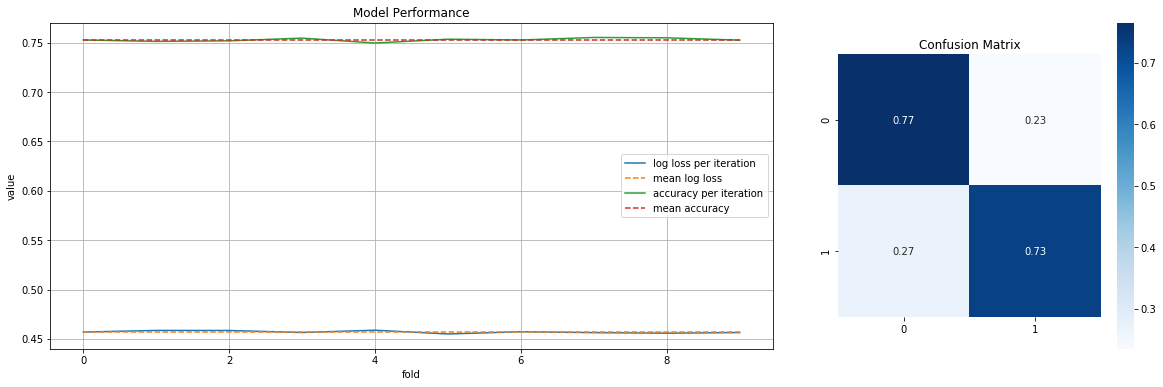

In [11]:
model = XGBClassifier(max_depth=5)
xgb_performance, xgb_cm, xgb_model = train_model(model, data, feats, 'is_duplicate')
print('Mean Loss', np.mean(xgb_performance['log loss']), '+-', np.std(xgb_performance['log loss']))

Mean Loss 0.8140637732153595 +- 0.013903038080102285


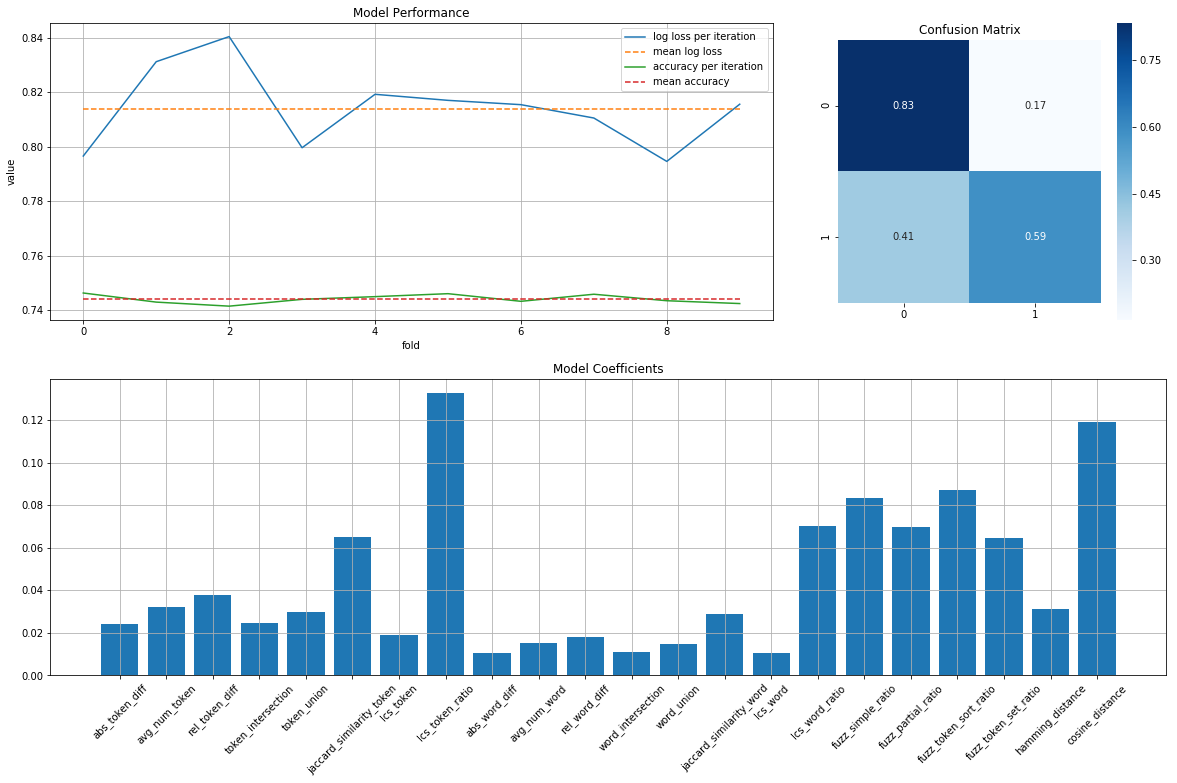

In [12]:
model = RandomForestClassifier(class_weight='balanced')
rf_performance, rf_cm, rf_model = train_model_rf(model, data, feats, 'is_duplicate')
print('Mean Loss', np.mean(rf_performance['log loss']), '+-', np.std(rf_performance['log loss']))

Mean Loss 0.4688868763348581 +- 0.0011401434265741622


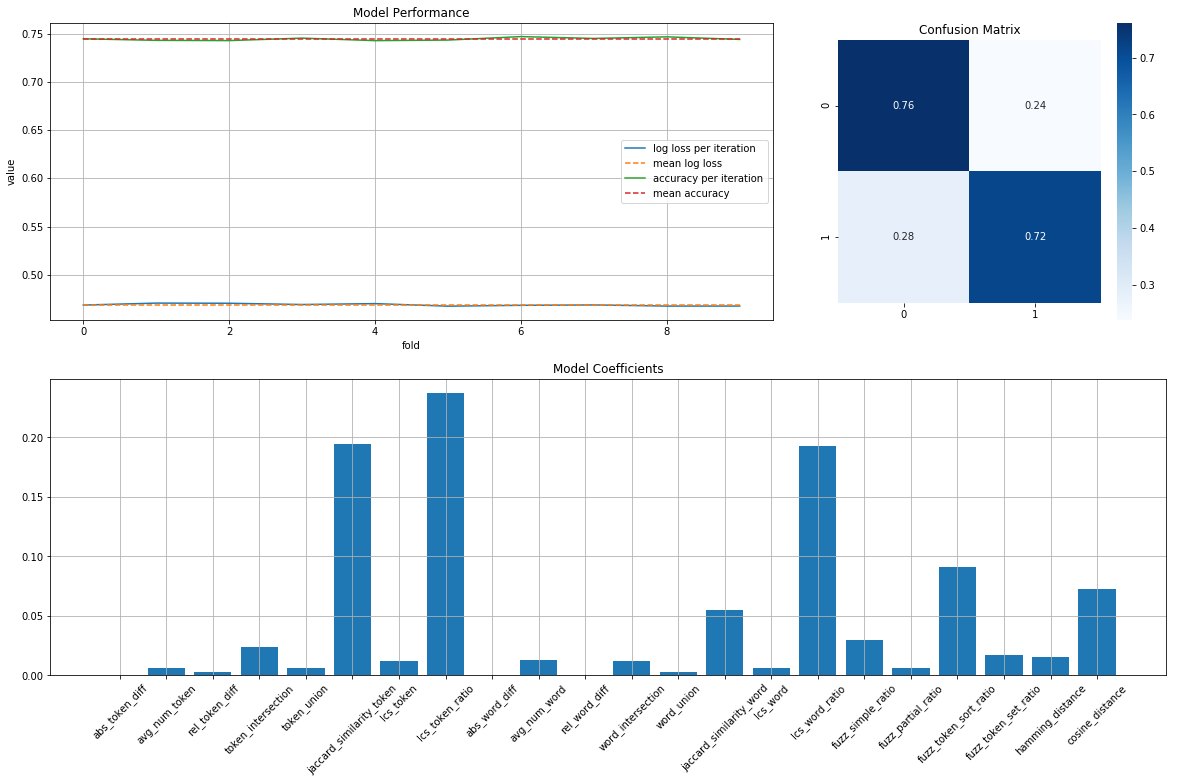

In [13]:
model = GradientBoostingClassifier()
gb_performance, gb_cm, gb_model = train_model_rf(model, data, feats, 'is_duplicate')
print('Mean Loss', np.mean(gb_performance['log loss']), '+-', np.std(gb_performance['log loss']))

Mean Loss 0.8089114200457297 +- 0.024104867490799757


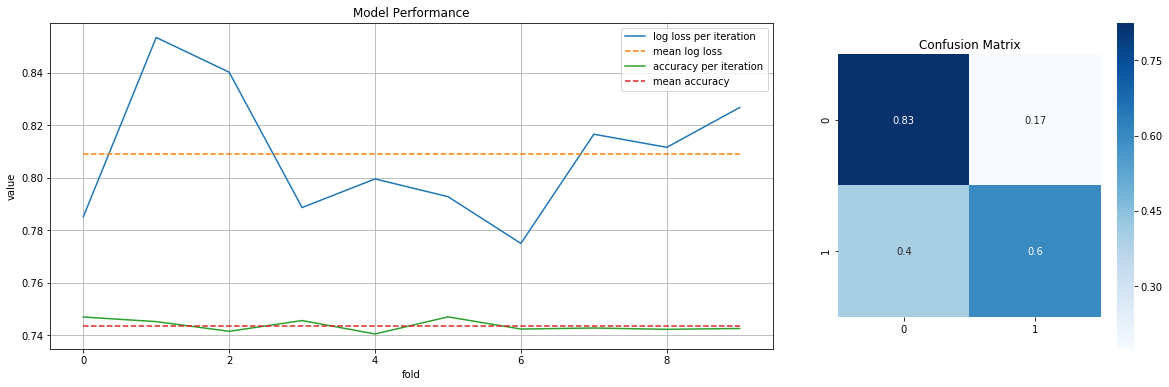

In [14]:
model = BaggingClassifier()
bc_performance, bc_cm, bc_model = train_model(model, data, feats, 'is_duplicate')
print('Mean Loss', np.mean(bc_performance['log loss']), '+-', np.std(bc_performance['log loss']))

In [15]:
model_loss = [np.mean(lr_performance['log loss']), np.mean(xgb_performance['log loss']), np.mean(rf_performance['log loss']), 
              np.mean(gb_performance['log loss']), np.mean(bc_performance['log loss'])]
model_fp = [lr_cm[0][1], xgb_cm[0][1], rf_cm[0][1], gb_cm[0][1], bc_cm[0][1]]
model_fn = [lr_cm[1][0], xgb_cm[1][0], rf_cm[1][0], gb_cm[1][0], bc_cm[1][0]]

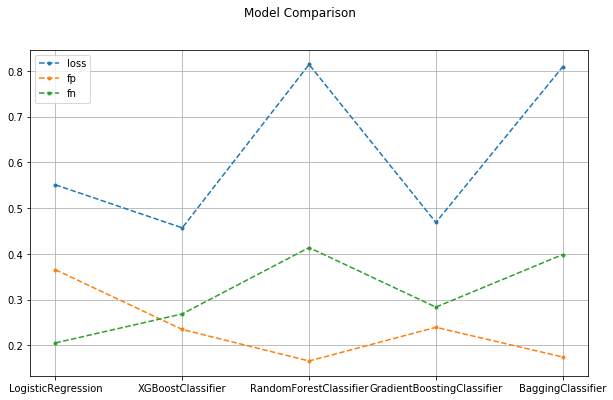

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))

fig.suptitle('Model Comparison')

ax.plot(model_loss, '.--', label='loss')
ax.plot(model_fp, '.--', label='fp')
ax.plot(model_fn, '.--', label='fn')

ax.set_xticks(np.arange(5))
ax.set_xticklabels(('LogisticRegression', 'XGBoostClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'BaggingClassifier'))

ax.grid()
ax.legend()

Mean Loss 0.4782602380099033 +- 0.0010653718218175707


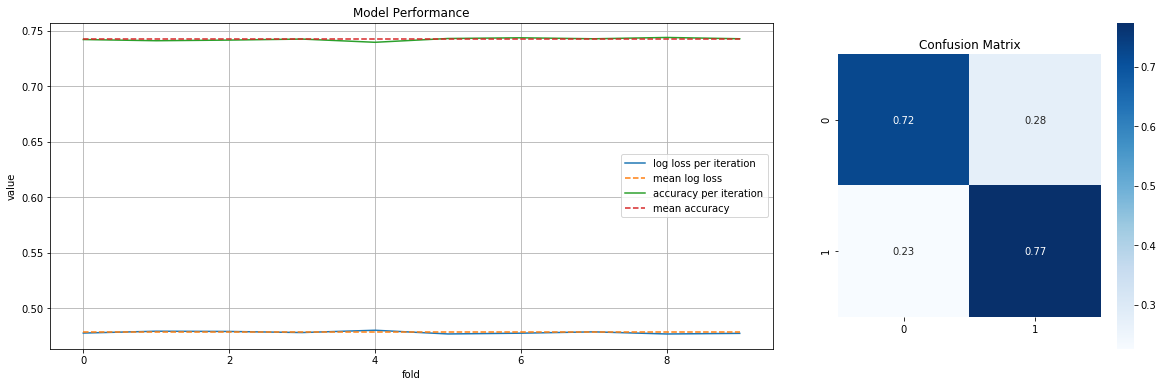

In [17]:
model = VotingClassifier(
    estimators=[('lr', LogisticRegression(class_weight='balanced')), ('xgb', XGBClassifier(max_depth=5)), 
                ('gbc', GradientBoostingClassifier())],
    voting='soft',
)
vc_performance, vc_cm, vc_model = train_model(model, data, feats, 'is_duplicate')
print('Mean Loss', np.mean(vc_performance['log loss']), '+-', np.std(vc_performance['log loss']))

In [18]:
import pickle

In [19]:
pickle.dump(vc_model, open('CustomFeaturesVotingClassifier.pkl', 'wb'))